In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [48]:
df = pd.read_csv('credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [49]:
# way to segregate numerical and categorical columns
df_num_col = df.select_dtypes(include = 'number')
df_cat_col = df.select_dtypes(include = 'object')

In [50]:
# encoding categorical features-
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    for i in df_cat_col.columns:
        res_df[i] = le.fit_transform(res_df[i])
    
    return res_df

In [51]:
encoded_df = preprocessor(df)

In [ ]:
# for col in df_cat:
#     le = LabelEncoder()
#     df_cat[col]= le.fit_transform(df_cat[col])
    

In [70]:
encoded_df.shape

(25134, 20)

In [71]:
encoded_df['TARGET'].value_counts()

0    24712
1      422
Name: TARGET, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

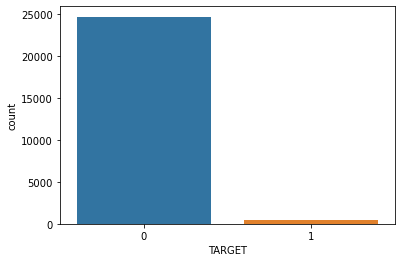

In [54]:
sns.countplot(encoded_df['TARGET'])

In [8]:
X=encoded_df.drop("TARGET",axis=1)
y=encoded_df.TARGET

In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: TARGET, Length: 25134, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

### Under Sampling

In [16]:
#!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.6.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.0 which is incompatible.


In [14]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [17]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_train_nm,y_train_nm=nm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_nm)))

The number of classes before fit Counter({0: 17302, 1: 291})
The number of classes after fit Counter({0: 291, 1: 291})


In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_nm,y_train_nm)

RandomForestClassifier()

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3724 3686]
 [   9  122]]
0.5100119347566636
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      7410
           1       0.03      0.93      0.06       131

    accuracy                           0.51      7541
   macro avg       0.51      0.72      0.37      7541
weighted avg       0.98      0.51      0.66      7541



### Over sampling-

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 17302, 1: 291})
The number of classes after fit Counter({0: 17302, 1: 17302})


In [27]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3724 3686]
 [   9  122]]
0.5100119347566636
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      7410
           1       0.03      0.93      0.06       131

    accuracy                           0.51      7541
   macro avg       0.51      0.72      0.37      7541
weighted avg       0.98      0.51      0.66      7541



In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight="balanced")
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [32]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7400   10]
 [  41   90]]
0.9932369712239756
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7410
           1       0.90      0.69      0.78       131

    accuracy                           0.99      7541
   macro avg       0.95      0.84      0.89      7541
weighted avg       0.99      0.99      0.99      7541



### Resampling(Oversampling and Undersampling)
This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

In [55]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = encoded_df[(encoded_df['TARGET']==0)] 
df_minority = encoded_df[(encoded_df['TARGET']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority,     # df_majority for undersample
                                 replace=True,    # sample with replacement
                                 n_samples= 24712,  # to match majority class, len(df_majority)
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [56]:
df_upsampled['TARGET'].value_counts()

1    24712
0    24712
Name: TARGET, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

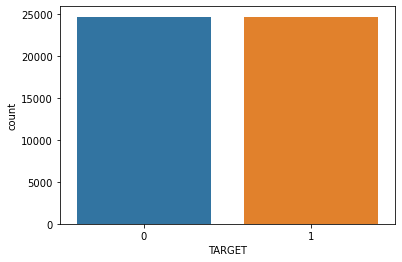

In [57]:
sns.countplot(df_upsampled['TARGET'])

In [98]:
X = df_upsampled.drop('TARGET', axis =1)
y = df_upsampled['TARGET']

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [100]:
# using ensemble technique random forest-
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X_train,y_train)


In [101]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7351   21]
 [   0 7456]]
0.9985837604531966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7372
           1       1.00      1.00      1.00      7456

    accuracy                           1.00     14828
   macro avg       1.00      1.00      1.00     14828
weighted avg       1.00      1.00      1.00     14828



In [102]:
# using logistic regression -
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X, y)
y_pred=lg.predict(X)

In [66]:
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

[[16969  7743]
 [ 5556 19156]]
0.7309202007122046
              precision    recall  f1-score   support

           0       0.75      0.69      0.72     24712
           1       0.71      0.78      0.74     24712

    accuracy                           0.73     49424
   macro avg       0.73      0.73      0.73     49424
weighted avg       0.73      0.73      0.73     49424



In [67]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y, y_pred)
logit_roc_auc

0.7309202007122046

In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

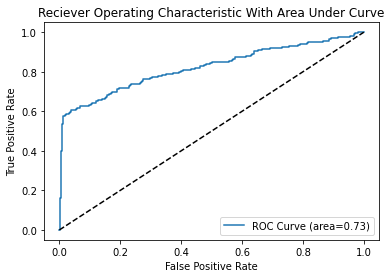

In [90]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %logit_roc_auc )
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

### SMOTE

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.


In [72]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(encoded_df.drop('TARGET', axis=1), encoded_df['TARGET'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [73]:
oversampled['TARGET'].value_counts()

0    24712
1    24712
Name: TARGET, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

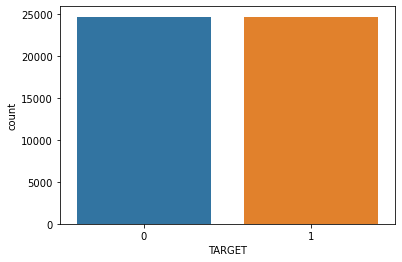

In [74]:
sns.countplot(df_upsampled['TARGET'])

In [91]:
X = df_upsampled.drop('TARGET', axis =1)
y = df_upsampled['TARGET']

In [92]:
# using ensemble technique random forest-
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X,y)


In [93]:
y_pred=classifier.predict(X)
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

[[24712     0]
 [    0 24712]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24712
           1       1.00      1.00      1.00     24712

    accuracy                           1.00     49424
   macro avg       1.00      1.00      1.00     49424
weighted avg       1.00      1.00      1.00     49424



In [81]:
# using logistic regression -
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X, y)
y_pred=lg.predict(X)

In [82]:
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

[[16969  7743]
 [ 5556 19156]]
0.7309202007122046
              precision    recall  f1-score   support

           0       0.75      0.69      0.72     24712
           1       0.71      0.78      0.74     24712

    accuracy                           0.73     49424
   macro avg       0.73      0.73      0.73     49424
weighted avg       0.73      0.73      0.73     49424



In [94]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y, y_pred)
logit_roc_auc

1.0

In [95]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

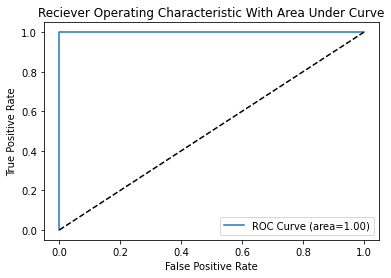

In [96]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %logit_roc_auc )
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

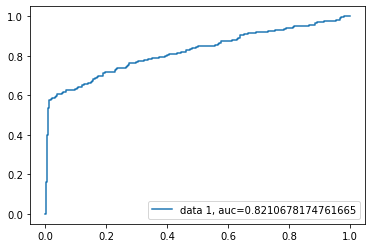

In [97]:
from sklearn import metrics
y_pred_proba = lg.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()